# 22081255

## Predicting Repair demand

[1. EXPLORATORY DATA ANALYSIS](#1)  
  
[2. DATA VISUALIZATION](#5)

[3. STATISTICAL ANALYSIS](#2)

[4. HANDLING MISSING VALUES](#3)

[5. CORRELATION ](#4)
> [4.1. Pearson's correlation](#41)

> [4.2. Spearman's correlation](#42)

[6. FEATURE SELECTION](#6)

[7. MODEL DEVELOPMENT](#7)
   >> [7.1. Model with manual preprocessing](#71)   
   >> [7.2. Model with selected feature](#72)  
   >> [7.3. Final Model](#73)

[8. HYPERPARAMETER](#8)
   >> [8.1. Hyperparameter optimisation using grid search](#81)   
   >> [8.2. Hyperparameter optimisation using Random search](#82)  
   >> [8.3. Feature Importance](#83)
   _______________________________


In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

from sklearn.exceptions import FitFailedWarning 
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression

## Load the data :

In [2]:
# Data path
#load and store data into a dataframe
df = pd.read_excel('C:/Users/c22081255/OneDrive - Cardiff University/Desktop/Data Science and Analytics/Dissertation/Data/02. Flat Files/repairs.xlsx')

## 1.Exploratory Data Analysis by analyzing the dataset<a name="1"></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829069 entries, 0 to 829068
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   num                         829069 non-null  int64         
 1   pr-seq-no                   829069 non-null  int64         
 2   sortrd-cde-1                829069 non-null  object        
 3   job_type                    829069 non-null  object        
 4   void-num                    829069 non-null  int64         
 5   jobsts-cde                  829069 non-null  object        
 6   postcode                    829059 non-null  object        
 7   rtb-dat                     58841 non-null   datetime64[ns]
 8   demolish-dat                10616 non-null   datetime64[ns]
 9   str-cde                     829059 non-null  float64       
 10  prtyp-cde                   829059 non-null  object        
 11  loc-nam-2                   829059 non-

In [4]:
# Results
print(f'Data dimension: {df.shape}')
print (df.columns)

# Display the first few rows of the DataFrame
df.head()

Data dimension: (829069, 24)
Index(['num', 'pr-seq-no', 'sortrd-cde-1', 'job_type', 'void-num',
       'jobsts-cde', 'postcode', 'rtb-dat', 'demolish-dat', 'str-cde',
       'prtyp-cde', 'loc-nam-2', 'construction-yr', 'Age', 'ownership-%',
       'No_of_bedroom', 'Building_type', 'tenu_cde', 'rntpaymd_cde',
       'ttncytyp_cde', 'right-to-repair', 'Days_to_complete',
       'pty_classification_subtype', 'pty_classification'],
      dtype='object')


,num,pr-seq-no,sortrd-cde-1,job_type,void-num,jobsts-cde,postcode,rtb-dat,demolish-dat,str-cde,...,ownership-%,No_of_bedroom,Building_type,tenu_cde,rntpaymd_cde,ttncytyp_cde,right-to-repair,Days_to_complete,pty_classification_subtype,pty_classification
0,1,10257,G,GLAZIER,0,70,GL4 9UJ,NaT,2000-04-24,222.0,...,100.0,3.0,House,CT,CASH,TF,0,10.0,Repair,Void Works
1,1,10333,GF,GAS FITTER,0,90,GL4 6AY,NaT,NaT,234.0,...,100.0,3.0,House,ET,DDWK,TF,0,18.0,Repair,Emergency Repair
2,2,15730,MI,MISCELLANEOUS,0,90,GL1 4EP,NaT,NaT,3168.0,...,100.0,1.0,Flat,CT,CASH,TF,0,16.0,Repair,Void Works
3,2,15584,W,WOODWORKER,0,90,GL1 4QB,NaT,NaT,3066.0,...,100.0,4.0,House,CT,CASH,TF,0,NaN,Other,Other
4,3,16862,W,WOODWORKER,0,70,GL2 2SF,NaT,NaT,8069.0,...,100.0,2.0,House,CT,CASH,TF,0,49.0,Repair,Routine Repair


In [5]:
# Check the summary statistics of numeric columns
df.describe()

,num,pr-seq-no,void-num,str-cde,construction-yr,Age,ownership-%,No_of_bedroom,right-to-repair,Days_to_complete
count,8.290690e+05,829069.000000,829069.000000,829059.000000,829059.000000,829059.000000,828010.000000,828381.000000,829069.000000,823743.000000
mean,4.728470e+05,13631.654603,423.624008,2058.732586,1948.140313,74.859687,96.975138,1.786385,0.092248,39.048291
std,3.078239e+05,2443.702861,2267.494001,1467.381305,137.348342,137.348342,17.082287,1.062706,0.289376,72.147768
min,1.000000e+00,6906.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.078250e+05,11751.000000,0.000000,942.000000,1952.000000,52.000000,100.000000,1.000000,0.000000,8.000000
50%,5.240540e+05,13707.000000,0.000000,1920.000000,1956.000000,67.000000,100.000000,2.000000,0.000000,28.000000
75%,7.313380e+05,15696.000000,0.000000,2916.000000,1971.000000,71.000000,100.000000,3.000000,0.000000,31.000000
max,1.000000e+08,18587.000000,20837.000000,34700.000000,2023.000000,2023.000000,100.000000,5.000000,1.000000,4220.000000


In [6]:
df.dtypes

num                                    int64
pr-seq-no                              int64
sortrd-cde-1                          object
job_type                              object
void-num                               int64
jobsts-cde                            object
postcode                              object
rtb-dat                       datetime64[ns]
demolish-dat                  datetime64[ns]
str-cde                              float64
prtyp-cde                             object
loc-nam-2                             object
construction-yr                      float64
Age                                  float64
ownership-%                          float64
No_of_bedroom                        float64
Building_type                         object
tenu_cde                              object
rntpaymd_cde                          object
ttncytyp_cde                          object
right-to-repair                        int64
Days_to_complete                     float64
pty_classi

,num,pr-seq-no,void-num,str-cde,construction-yr,Age,ownership-%,No_of_bedroom,right-to-repair,Days_to_complete
count,829069.00,829069.00,829069.00,829059.00,829059.00,829059.00,828010.00,828381.00,829069.00,823743.00
mean,472846.98,13631.65,423.62,2058.73,1948.14,74.86,96.98,1.79,0.09,39.05
std,307823.91,2443.70,2267.49,1467.38,137.35,137.35,17.08,1.06,0.29,72.15
min,1.00,6906.00,0.00,36.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,207825.00,11751.00,0.00,942.00,1952.00,52.00,100.00,1.00,0.00,8.00
50%,524054.00,13707.00,0.00,1920.00,1956.00,67.00,100.00,2.00,0.00,28.00
75%,731338.00,15696.00,0.00,2916.00,1971.00,71.00,100.00,3.00,0.00,31.00
max,99999999.00,18587.00,20837.00,34700.00,2023.00,2023.00,100.00,5.00,1.00,4220.00


<AxesSubplot:>

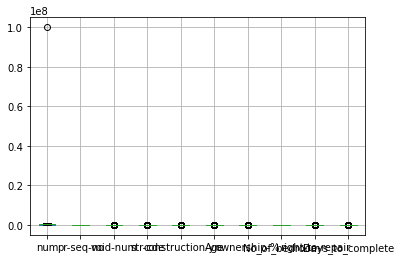

In [7]:
# 5.Descriptive summary of the dataset:
df_num = df[df.describe().columns]
display(df_num.describe().round(2))
df_num.boxplot()

In [8]:
pd.DataFrame(df.nunique())

,0
num,829064
pr-seq-no,7990
sortrd-cde-1,71
job_type,71
void-num,13177
jobsts-cde,15
postcode,638
rtb-dat,745
demolish-dat,151
str-cde,388


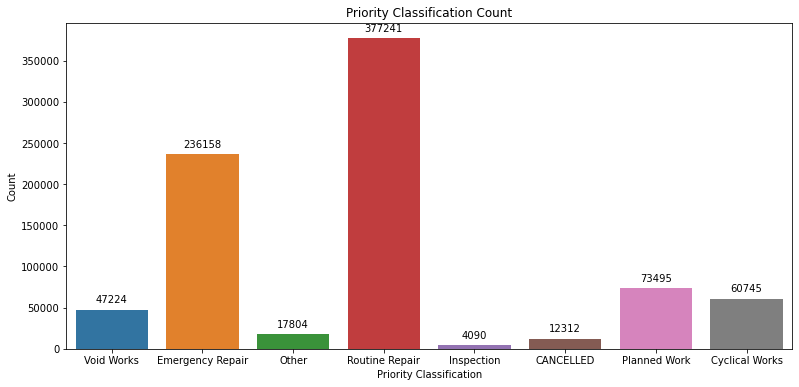

In [9]:
# Set the figure size
plt.figure(figsize=(13, 6))

# Create the count plot
ax = sns.countplot(x='pty_classification', data=df)

# Set labels and title
plt.xlabel('Priority Classification')
plt.ylabel('Count')
plt.title('Priority Classification Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Display the plot
plt.show()

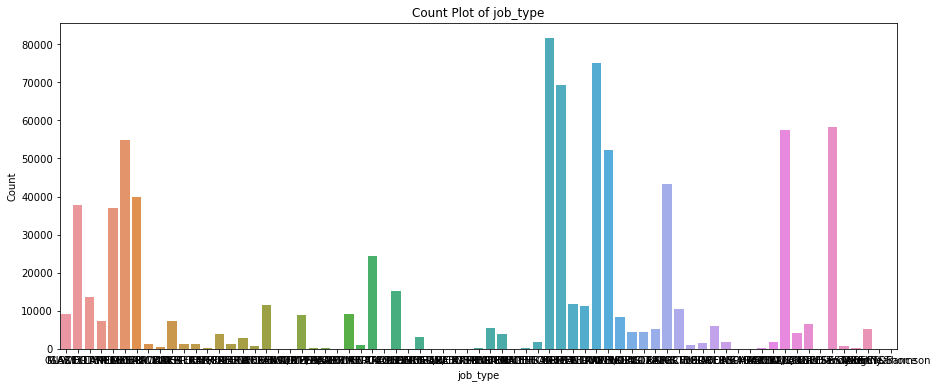

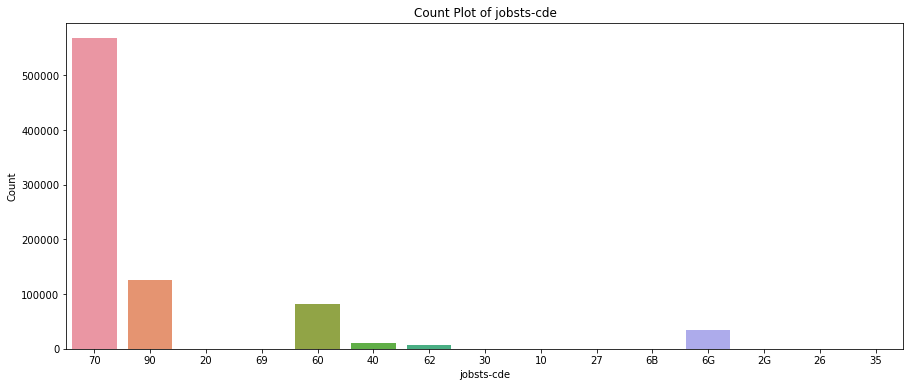

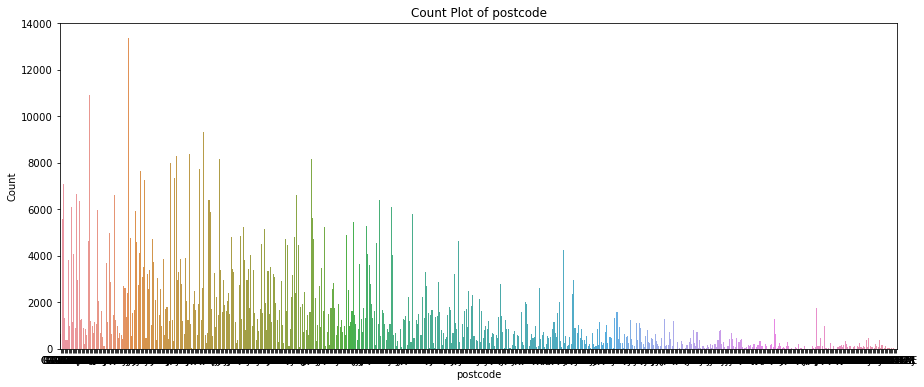

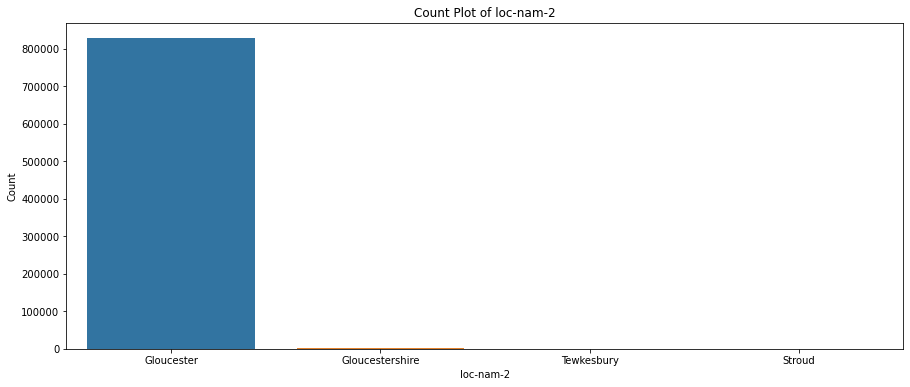

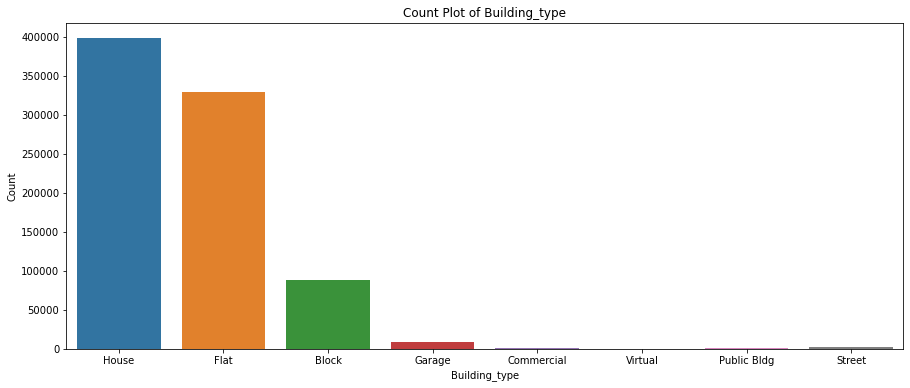

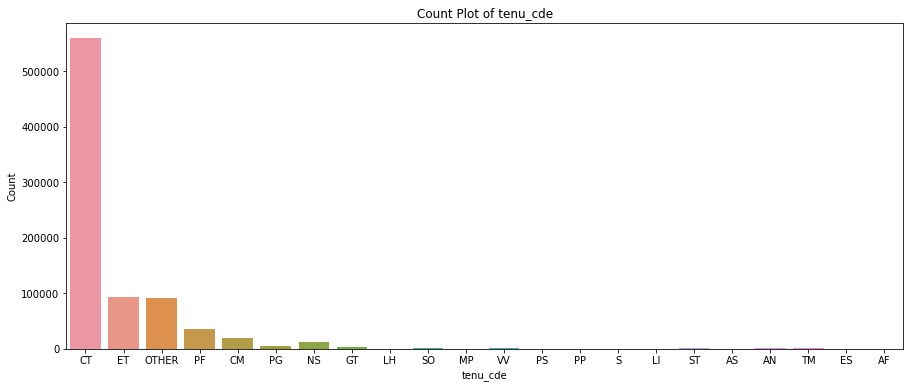

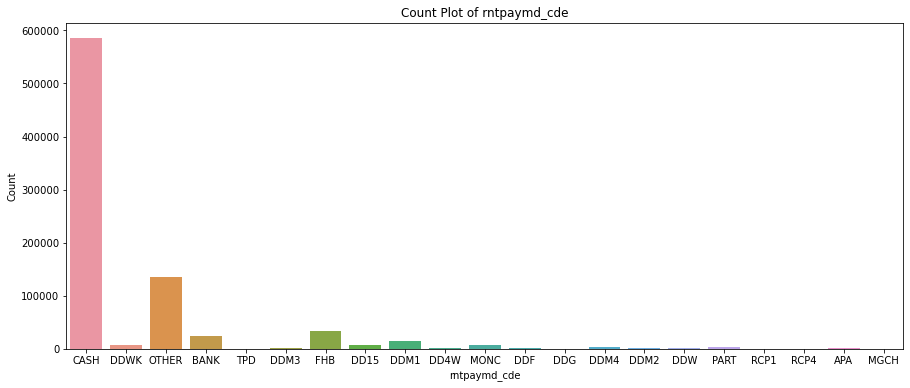

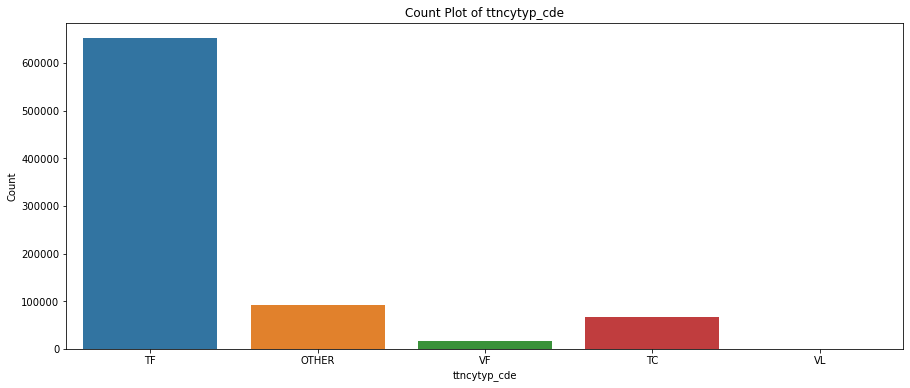

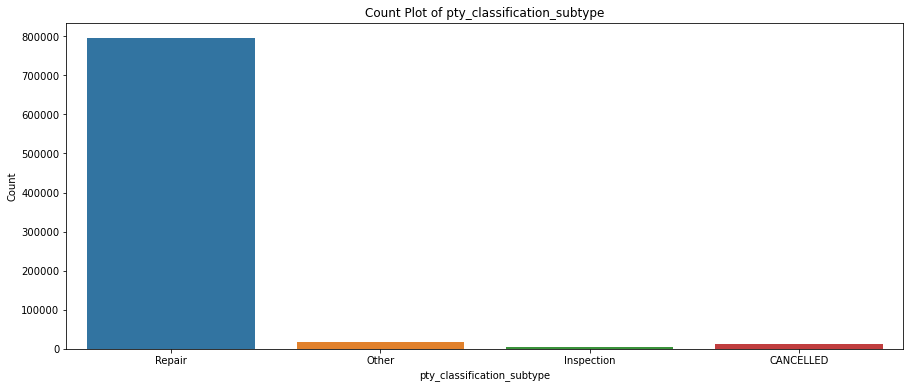

In [10]:
# Count plot for categorical columns
categorical_cols = ['job_type', 'jobsts-cde', 'postcode', 'loc-nam-2', 'Building_type', 'tenu_cde', 'rntpaymd_cde', 'ttncytyp_cde', 'pty_classification_subtype']
for col in categorical_cols:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=col, data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {col}')
    plt.show()

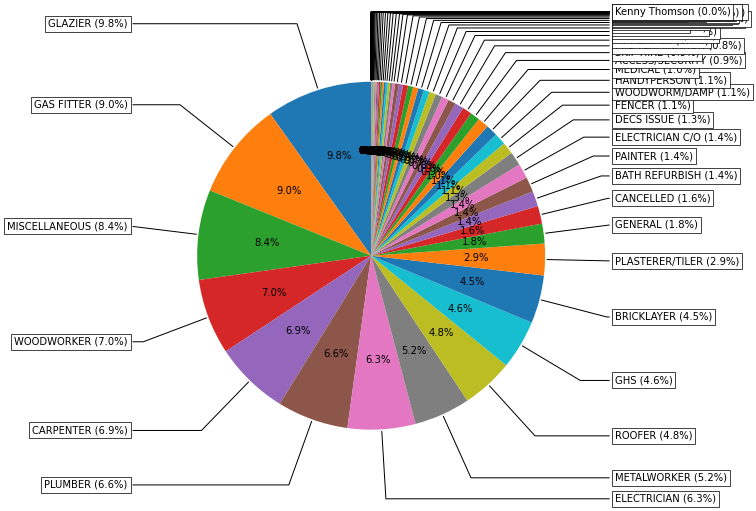

In [11]:
import matplotlib.pyplot as plt

# Get data
categories = df['job_type'].unique()
values = df['job_type'].value_counts()

# Calculate percentages
values_percent = (values / values.sum()) * 100

# Plot pie 
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotext = ax.pie(values, autopct='%1.1f%%', startangle=90)

# Add category labels
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center", size=10)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    ax.annotate(f"{categories[i]} ({values_percent[i].round(1)}%)", xy=(x,y), xytext=(1.4*np.sign(x), 1.4*y),
                horizontalalignment = horizontalalignment, **kw)

plt.show()

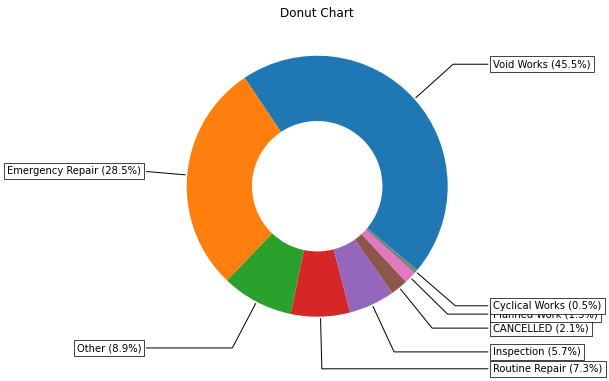

In [12]:
categories = df['pty_classification'].unique()
values = df['pty_classification'].value_counts()

# Create donut chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal")) 

wedges, texts = ax.pie(values, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), 
          bbox=bbox_props, zorder=0, va="center")

# Get percent values 
values_percent = (values/sum(values)) * 100

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    # Add percent to annotation
    percent = values_percent[i].round(1)
    ax.annotate("{0} ({1}%)".format(categories[i], percent), 
                xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), 
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Donut Chart")
plt.show()

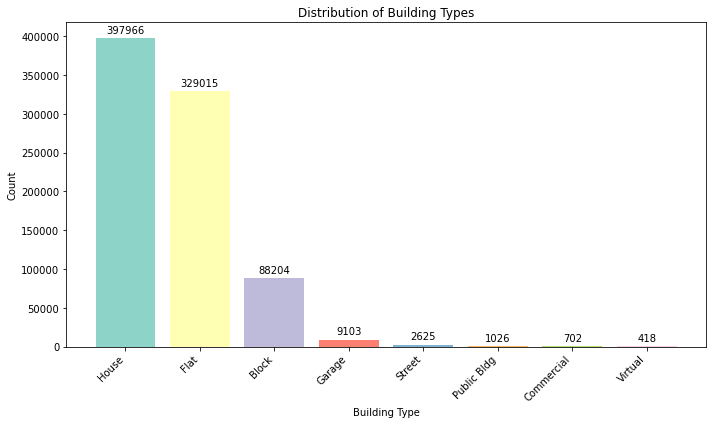

In [13]:
building_types = df['Building_type'] 
building_type_counts = building_types.value_counts()

# Create a custom color palette with a unique color for each building type
color_palette = sns.color_palette("Set3", n_colors=len(building_type_counts))

# Create bar chart
plt.figure(figsize=(10, 6))  # Set plot size

bars = plt.bar(building_type_counts.index, building_type_counts.values, color=color_palette)

plt.xlabel('Building Type')
plt.ylabel('Count')
plt.title('Distribution of Building Types')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

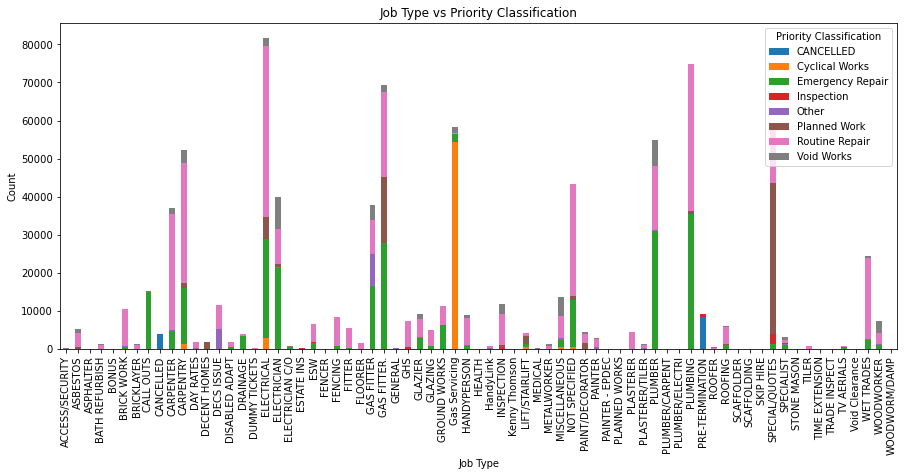

In [14]:
# Stacked Bar Plot
stacked_counts = df.groupby(['job_type', 'pty_classification']).size().unstack(fill_value=0)
stacked_counts.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Job Type vs Priority Classification')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Priority Classification')
plt.show()

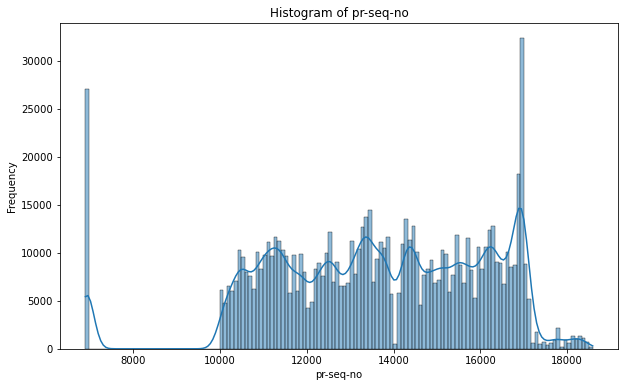

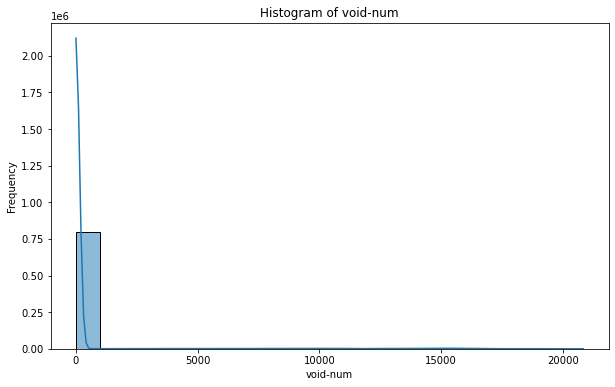

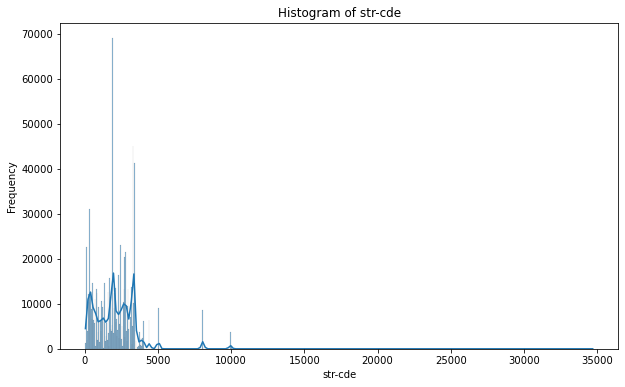

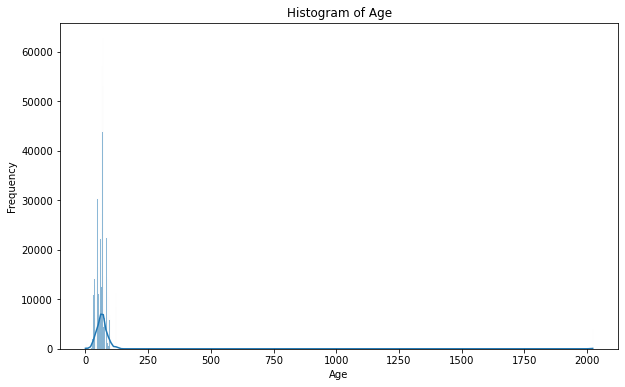

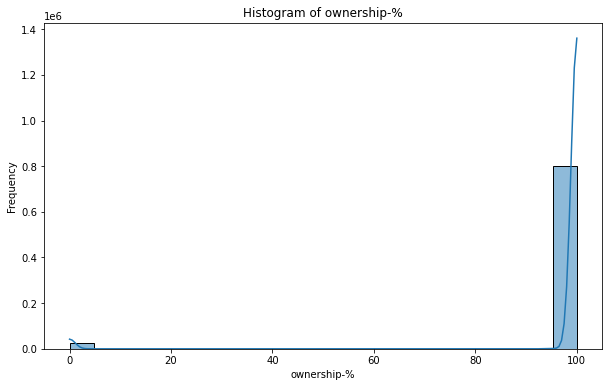

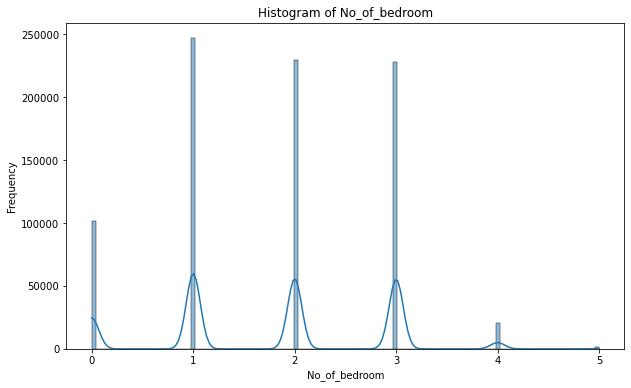

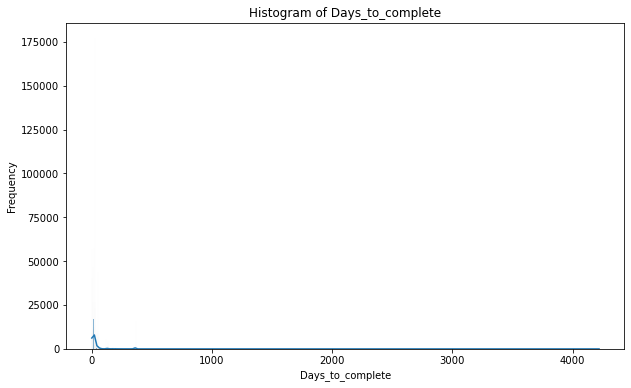

In [15]:
# Histograms for numeric columns
numeric_cols = ['pr-seq-no', 'void-num', 'str-cde', 'Age', 'ownership-%', 'No_of_bedroom', 'Days_to_complete']
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

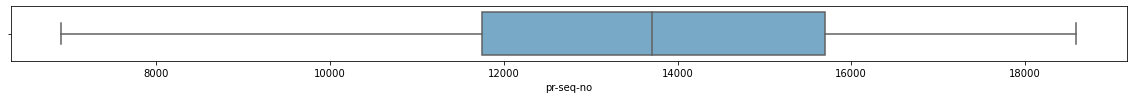

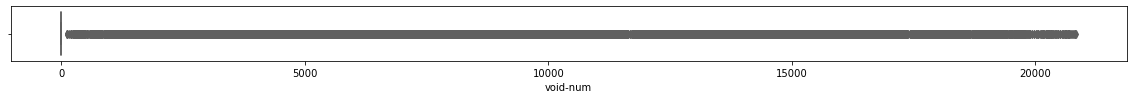

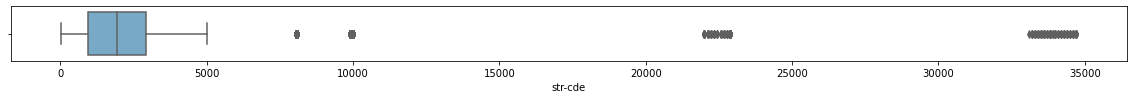

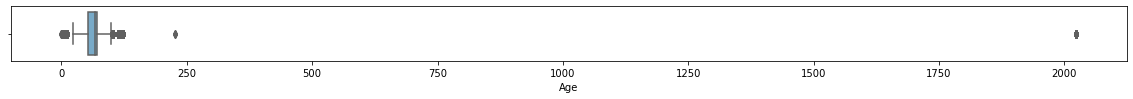

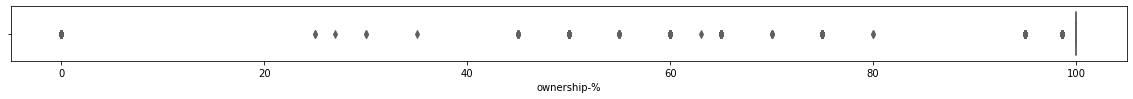

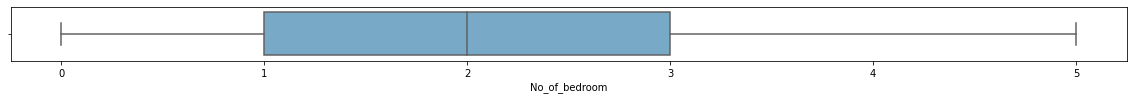

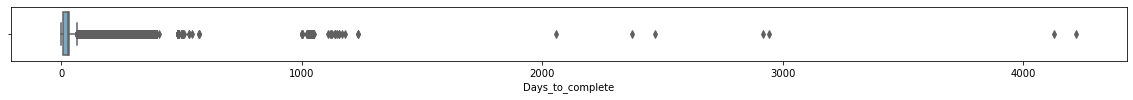

In [16]:
# Checking for outliers using boxing only on Numerical features
for cat in numeric_cols:
    plt.figure(figsize=(20,1))    
    sns.boxplot(data=df, x=cat,palette='Blues')
 

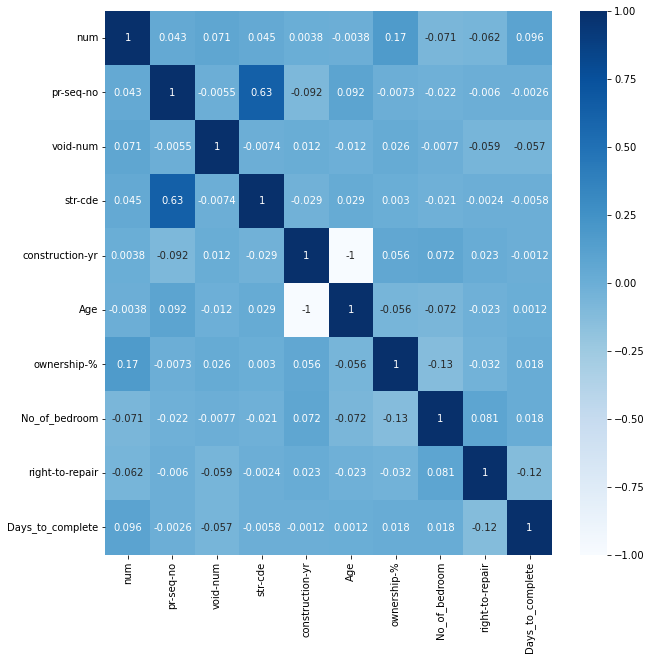

In [17]:
#Pearson's correlation
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues")

### 4.2. Spearman's correlation <a name="42"></a>

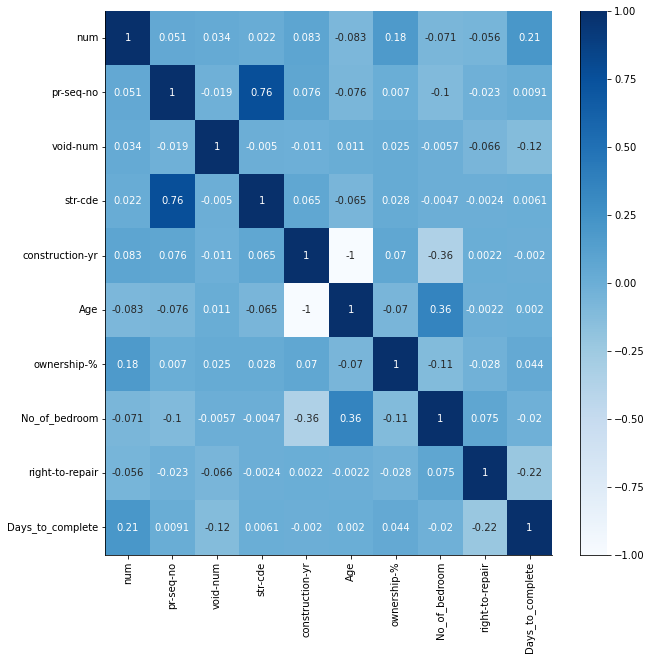

In [18]:
#Spearman's correlation
corr = df.corr(method='spearman')
g = sns.heatmap(corr, annot=True, cmap="Blues")
sns.despine()
g.figure.set_size_inches(10,10)

In [19]:
# Matches the above value counts
print(df['pty_classification'].value_counts())

Routine Repair      377241
Emergency Repair    236158
Planned Work         73495
Cyclical Works       60745
Void Works           47224
Other                17804
CANCELLED            12312
Inspection            4090
Name: pty_classification, dtype: int64


In [20]:
print(df['sortrd-cde-1'].unique())
print(df['jobsts-cde'].unique())
print(df['postcode'].unique())
print(df['loc-nam-2'].unique())
print(df['Building_type'].unique())
print(df['tenu_cde'].unique())
print(df['rntpaymd_cde'].unique())
print(df['ttncytyp_cde'].unique())
print(df['pty_classification_subtype'].unique())


['G' 'GF' 'MI' 'W' 'C' 'P' 'E' 'M' 'R' 'GH' 'BR' 'PL' 'GE' 'CC' 'BC' 'PD'
 'E1' 'DM' 'F' 'WD' 'H' 'MA' 'A' 'SH' 'PT' 'TV' 'WT' 'SC' 'CO' 'B' 'S'
 'PE' 'PC' 'TI' 'EX' 'PO' 'FI' 'D' 'EH' 'DT' 'DH' '0E' '0G' 'IN' '0W' '0P'
 '0C' '0F' '0D' '0L' '0Z' 'NS' '0B' '0T' '0O' '0R' '0X' '0M' '0A' '0S'
 'DR' 'SP' 'LS' 'EW' 'PW' 'GS' 'HP' 'EI' 'AS' 'VC' 'OT']
[70 90 20 69 60 40 62 30 10 27 '6B' '6G' '2G' 26 35]
['GL4 9UJ' 'GL4 6AY' 'GL1 4EP' 'GL1 4QB' 'GL2 2SF' 'GL4 6RS' 'GL4 6UN'
 'GL4 6YW' 'GL4 6LQ' 'GL2 5AD' 'GL2 5BQ' 'GL1 5AQ' 'GL4 6UY' 'GL4 6UW'
 'GL4 6QD' 'GL1 4DR' 'GL4 6RU' 'GL1 4QW' 'GL4 6DW' 'GL2 6AH' 'GL1 4RY'
 'GL4 6HT' 'GL4 6LL' 'GL4 0RQ' 'GL4 0YE' 'GL4 6JD' 'GL4 0JU' 'GL4 6NA'
 'GL4 6LA' 'GL4 6ND' 'GL4 0YL' 'GL4 0QY' 'GL4 9TX' 'GL1 4ET' 'GL2 6AL'
 'GL1 4RJ' 'GL3 3LU' 'GL4 0HD' 'GL4 0EJ' 'GL4 6TY' 'GL4 0YA' 'GL2 5AN'
 'GL1 4NJ' 'GL1 4RE' 'GL1 5JD' 'GL1 4QJ' 'GL1 4BW' 'GL1 4LW' 'GL4 0LZ'
 'GL2 5BP' 'GL4 4RF' 'GL3 3LT' 'GL4 6EJ' 'GL4 4RE' 'GL4 9UL' 'GL3 3RQ'
 'GL4 6BJ' 'GL2 5AG' 'GL2 5BD' 

In [21]:
# Find the missing data by percentage
total = df.isnull().sum()
percentage = (total/df.isnull().count()).round(4)*100
NAs = pd.concat([total,percentage],axis=1,keys=('Total','Percentage'))
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

,Total,Percentage
demolish-dat,818453,98.72
rtb-dat,770228,92.90
Days_to_complete,5326,0.64
ownership-%,1059,0.13
No_of_bedroom,688,0.08
postcode,10,0.00
str-cde,10,0.00
prtyp-cde,10,0.00
loc-nam-2,10,0.00
construction-yr,10,0.00


In [22]:
df.dropna(subset = ['postcode'], inplace=True)
df = df.drop(columns=['num', 'job_type', 'rtb-dat', 'demolish-dat', 'prtyp-cde', 'construction-yr'])
df['Days_to_complete'].fillna(int(df['Days_to_complete'].mean()), inplace=True)
df['No_of_bedroom'] = df['No_of_bedroom'].fillna(0)
df['ownership-%'] = df['ownership-%'].fillna(100)
df['jobsts-cde'] = df['jobsts-cde'].astype(str)
df['postcode'] = df['postcode'].replace(0, method='ffill')

In [23]:
# Split the postcode column into two columns
df[['postcode_part1', 'postcode_part2']] = df['postcode'].str.split(' ', 1, expand=True)

# Define a mapping dictionary for town names
town_mapping = {
    'GL1': 'Gloucester',
    'GL10': 'Stonehouse',
    'GL2': 'Gloucester',
    'GL20': 'Ashchurch',
    'GL3': 'Hucclecote',
    'GL4': 'Gloucester',
    'GL5': 'Rodborough',
    'GL51': 'Cheltenham',
    'GL6': 'Thrupp'
}

# Map the values in the postcode_part1 column to the corresponding town names
df['town'] = df['postcode_part1'].map(town_mapping)

In [24]:
df['pty_classification'].unique()

array(['Void Works', 'Emergency Repair', 'Other', 'Routine Repair',
       'Inspection', 'CANCELLED', 'Planned Work', 'Cyclical Works'],
      dtype=object)

In [25]:
# Splitting the data into features and target
df1 = df
X = df1.drop(['pty_classification'], axis=1)
y = df1['pty_classification']

# Encoding the labels for classification problems
label_encode = LabelEncoder()
labels = label_encode.fit_transform(y)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer([
    ('numeric', StandardScaler(), ['pr-seq-no', 'void-num', 'str-cde', 'Age', 'ownership-%', 'No_of_bedroom', 'Days_to_complete']),
    
    ('categorical', OneHotEncoder(), ['sortrd-cde-1', 'jobsts-cde', 'loc-nam-2', 'town', 'Building_type', 'tenu_cde', 'rntpaymd_cde', 'right-to-repair', 'ttncytyp_cde', 'pty_classification_subtype'])
])

In [26]:
print(X.shape)
print(y.shape)
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

(829059, 20)
(829059,)
X_train shape (663247, 20) and size 13264940
X_test shape (165812, 20) and size 3316240
y_train shape (663247,) and size 663247
y_test shape (165812,) and size 165812


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_models(models, X_train, X_test, y_train, y_test, preprocessor):
    results, cm, report = [], [], []

    for name, model in models:
        # Create a pipeline with preprocessing and the classifier
        myClassifier = Pipeline([('preprocessing', preprocessor), ('classifier', model)])
        # Fit the pipeline on the training data
        myClassifier.fit(X_train, y_train)
        # Make predictions on the test data
        y_pred = myClassifier.predict(X_test)

        # Calculate classification report and confusion matrix
        report.append(classification_report(y_test, y_pred))
        cm.append(metrics.confusion_matrix(y_test, y_pred))

        # Calculate and store the accuracy score
        score = accuracy_score(y_test, y_pred)
        results.append("The Score of %s is: %2.2f" % (name, score))
    
    for result, confusion_matrix, classification_reports in zip(results, cm, report):
        print(result, '\n', classification_reports)
        
        unique_labels = sorted(set(y_test))
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=unique_labels)
        
        # Set the figure size to display all label names
        plt.figure(figsize=(len(unique_labels), len(unique_labels)))
        
        cm_display.plot(xticks_rotation=90)
        plt.show()
    
    return results, cm, report

### Logistic Regression

The Score of LogisticRegression is: 0.89 
                   precision    recall  f1-score   support

       CANCELLED       1.00      1.00      1.00      2509
  Cyclical Works       0.98      0.90      0.94     11998
Emergency Repair       0.87      0.91      0.89     47379
      Inspection       1.00      1.00      1.00       823
           Other       1.00      1.00      1.00      3588
    Planned Work       0.87      0.83      0.85     14759
  Routine Repair       0.91      0.95      0.93     75267
      Void Works       0.65      0.39      0.49      9489

        accuracy                           0.89    165812
       macro avg       0.91      0.87      0.89    165812
    weighted avg       0.89      0.89      0.89    165812



<Figure size 576x576 with 0 Axes>

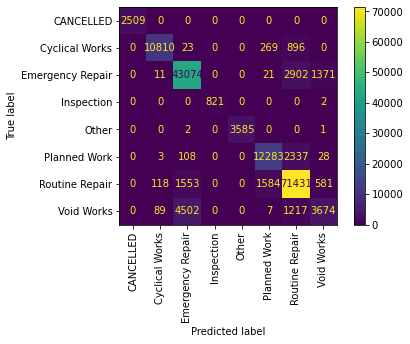

In [28]:
# Define the models
models = [('LogisticRegression', LogisticRegression())]

# Call the function to evaluate models
results, cm, report = evaluate_models(models, X_train, X_test, y_train, y_test, preprocessor)


### Decision Tree

The Score of DecisionTreeClassifier is: 0.96 
                   precision    recall  f1-score   support

       CANCELLED       1.00      1.00      1.00      2509
  Cyclical Works       0.97      0.97      0.97     11998
Emergency Repair       0.95      0.95      0.95     47379
      Inspection       1.00      1.00      1.00       823
           Other       1.00      1.00      1.00      3588
    Planned Work       0.94      0.98      0.96     14759
  Routine Repair       0.97      0.97      0.97     75267
      Void Works       0.86      0.85      0.86      9489

        accuracy                           0.96    165812
       macro avg       0.96      0.96      0.96    165812
    weighted avg       0.96      0.96      0.96    165812



<Figure size 576x576 with 0 Axes>

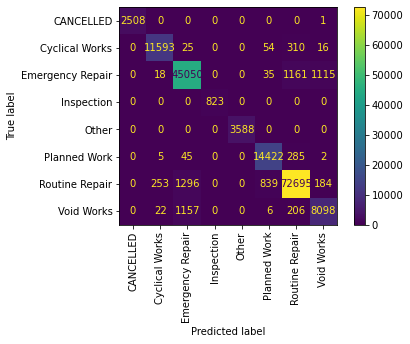

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Define the models
models = [('DecisionTreeClassifier', DecisionTreeClassifier())]

# Call the function to evaluate models
results, cm, report = evaluate_models(models, X_train, X_test, y_train, y_test, preprocessor)

### BaggingClassifier

The Score of BaggingClassifier is: 0.96 
                   precision    recall  f1-score   support

       CANCELLED       1.00      1.00      1.00      2509
  Cyclical Works       0.99      0.97      0.98     11998
Emergency Repair       0.95      0.96      0.95     47379
      Inspection       1.00      1.00      1.00       823
           Other       1.00      1.00      1.00      3588
    Planned Work       0.94      0.98      0.96     14759
  Routine Repair       0.97      0.97      0.97     75267
      Void Works       0.89      0.87      0.88      9489

        accuracy                           0.96    165812
       macro avg       0.97      0.97      0.97    165812
    weighted avg       0.96      0.96      0.96    165812



<Figure size 576x576 with 0 Axes>

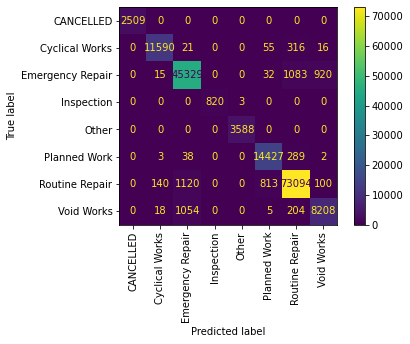

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def bagging_models(models, X_train, X_test, y_train, y_test, preprocessor):
    results, cm, report = [], [], []
    for name, model in models:
        # Create a pipeline with preprocessing and the classifier
        myClassifier = Pipeline([('preprocessing', preprocessor), ('classifier', model)])

        # Fit the pipeline on the training data
        myClassifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = myClassifier.predict(X_test)

        # Calculate classification report and confusion matrix
        report.append(classification_report(y_test, y_pred))
        cm.append(confusion_matrix(y_test, y_pred))

        # Calculate and store the accuracy score
        score = accuracy_score(y_test, y_pred)
        results.append("The Score of %s is: %2.2f" % (name, score))

    return results, cm, report
models = [('BaggingClassifier', BaggingClassifier())]

results, cm, report = bagging_models(models, X_train, X_test, y_train, y_test, preprocessor)

for result, confusion_matrix, classification_report in zip(results, cm, report):
    print(result, '\n', classification_report)
    # Create the confusion matrix display with the correct labels
    unique_labels = sorted(set(y_test))  # Get unique class labels
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=unique_labels)

    # Set the figure size to display all label names
    plt.figure(figsize=(len(unique_labels), len(unique_labels)))

    cm_display.plot(xticks_rotation=90)
    plt.show()


### GradientBoostingClassifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def gradient_model(models, X_train, X_test, y_train, y_test, preprocessor):
    results, cm, report = [], [], []
    for name, model in models:
        # Create a pipeline with preprocessing and the classifier
        myClassifier = Pipeline([('preprocessing', preprocessor), ('classifier', model)])
        # Fit the pipeline on the training data
        myClassifier.fit(X_train, y_train)
        # Make predictions on the test data
        y_pred = myClassifier.predict(X_test)

        # Calculate classification report and confusion matrix
        report.append(classification_report(y_test, y_pred))
        cm.append(confusion_matrix(y_test, y_pred))

        # Calculate and store the accuracy score
        score = accuracy_score(y_test, y_pred)
        results.append("The Score of %s is: %2.2f" % (name, score))

    return results, cm, report
models = [('GradientBoostingClassifier', GradientBoostingClassifier())]

results, cm, report = gradient_model(models, X_train, X_test, y_train, y_test, preprocessor)

y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

for result, confusion_matrix, classification_report in zip(results, cm, report):
    print(result, '\n', classification_report)
    unique_labels = sorted(set(y_test_decoded))
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=unique_labels)

    # Set the figure size to display all label names
    plt.figure(figsize=(len(unique_labels), len(unique_labels)))

    cm_display.plot(xticks_rotation=90)
    plt.show()


NameError: name 'label_encoder' is not defined

### XGBClassifier

In [ ]:
# Import the necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

# Assuming 'df' is the DataFrame containing the data
X = df.drop(['pty_classification', 'postcode', 'postcode_part1', 'postcode_part2', 'right-to-repair'], axis=1)
y = df['pty_classification']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Define the column transformer for preprocessing
preprocessor = ColumnTransformer([
    ('numeric', StandardScaler(), ['pr-seq-no', 'void-num', 'str-cde', 'Age', 'ownership-%', 'No_of_bedroom', 'Days_to_complete']),
    ('categorical', OneHotEncoder(), ['sortrd-cde-1', 'jobsts-cde', 'loc-nam-2', 'Building_type', 'tenu_cde', 'rntpaymd_cde', 'ttncytyp_cde', 'pty_classification_subtype', 'town'])
])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data and transform both train and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create the XGBoost classifier
model = XGBClassifier()

# Fit the model on the preprocessed training data
model.fit(X_train_preprocessed, y_train)

# Make predictions on the preprocessed test data
y_pred = model.predict(X_test_preprocessed)

# Calculate classification report and confusion matrix
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Calculate and store the accuracy score
accuracy = accuracy_score(y_test, y_pred)
result = "The Score of XGBClassifier is: %2.2f" % accuracy

# Display the classification report and confusion matrix
print(result)
print(classification_report_result)
unique_labels = label_encoder.inverse_transform(sorted(set(y_test)))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=unique_labels)
plt.figure(figsize=(len(unique_labels), len(unique_labels)))
cm_display.plot(xticks_rotation=90)
plt.show()


In [ ]:
import joblib
import pickle

data = {"model" : model, "preprocessor":preprocessor, "label_encoder": label_encoder}
with open ('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

## XGB Classifier with SMOTE

SMOTE addresses class imbalance in real-world datasets by generating synthetic examples for the minority class, balancing class distribution and enabling the model to learn from it. This improves generalization performance by preventing overfitting on the majority class and providing additional diversity and complexity in training data.

The Score of XGBClassifier is: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2509
           1       0.99      0.97      0.98     11998
           2       0.95      0.92      0.93     47379
           3       1.00      1.00      1.00       823
           4       1.00      1.00      1.00      3588
           5       0.92      0.99      0.95     14759
           6       0.98      0.96      0.97     75267
           7       0.72      0.90      0.80      9489

    accuracy                           0.95    165812
   macro avg       0.95      0.97      0.95    165812
weighted avg       0.95      0.95      0.95    165812



<Figure size 576x576 with 0 Axes>

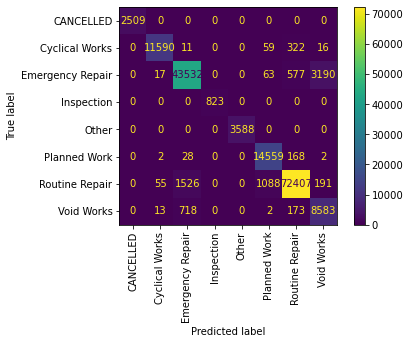

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Assuming 'df' is the DataFrame containing the data
X = df.drop(['pty_classification', 'postcode', 'postcode_part1', 'postcode_part2', 'right-to-repair'], axis=1)
y = df['pty_classification']


# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Define the column transformer for preprocessing
preprocessor = ColumnTransformer([
    ('numeric', StandardScaler(), ['pr-seq-no', 'void-num', 'str-cde', 'Age', 'ownership-%', 'No_of_bedroom', 'Days_to_complete']),
    ('categorical', OneHotEncoder(), ['sortrd-cde-1', 'jobsts-cde', 'loc-nam-2', 'Building_type', 'tenu_cde', 'rntpaymd_cde', 'ttncytyp_cde', 'pty_classification_subtype', 'town'])
])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE to balance the class distribution in the training data
smote = SMOTE(random_state=42)
X_train_preprocessed, y_train_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

# Transform the test data using the preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Create the XGBoost classifier
model = XGBClassifier()

# Fit the model on the resampled training data
model.fit(X_train_preprocessed, y_train_resampled)

# Make predictions on the preprocessed test data
y_pred = model.predict(X_test_preprocessed)

# Calculate classification report and confusion matrix
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Calculate and store the accuracy score
accuracy = accuracy_score(y_test, y_pred)
result = "The Score of XGBClassifier with smote is: %2.2f" % accuracy

# Display the classification report and confusion matrix
print(result)
print(classification_report_result)
unique_labels = label_encoder.inverse_transform(sorted(set(y_test)))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=unique_labels)
plt.figure(figsize=(len(unique_labels), len(unique_labels)))
cm_display.plot(xticks_rotation=90)
plt.show()


The comparison between an XGBClassifier model with and without using the SMOTE (Synthetic Minority Over-sampling Technique) technique for handling imbalanced classes in our dataset. From the classification report, we are drawing the conclusion that the XGBClassifier without SMOTE is performing well, especially in predicting the minor classes.

### Export the model as pickle

### ROC curve and AUC

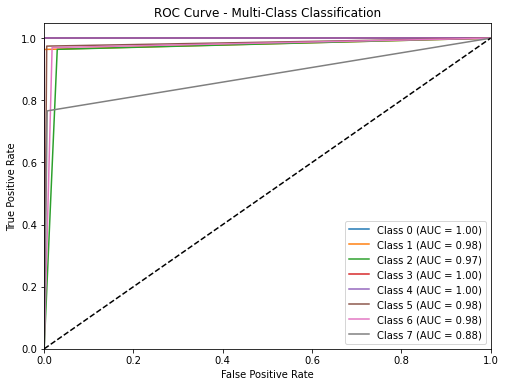

In [93]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

# Calculate ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Create the XGBoost classifier
model = XGBClassifier()

# Define the number of folds for cross-validation
n_splits = 5

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
accuracy_scores = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train_preprocessed, y_train):
    X_train_fold, X_val_fold = X_train_preprocessed[train_index], X_train_preprocessed[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Fit the model on the training fold
    model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation fold
    y_val_pred = model.predict(X_val_fold)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)

print(f'Average Accuracy: {average_accuracy:.4f}')

# Create a boxplot to visualize the cross-validation results
plt.figure(figsize=(8, 6))
plt.boxplot(accuracy_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Distribution')
plt.xticks(np.arange(1, n_splits+1), labels=np.arange(1, n_splits+1))
plt.show()


### **Hyperparameter search using random search**<a name="82"></a>

In [88]:
# Imports
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.05],
    'subsample': [0.5, 0.8, 1.0]
}

# Random Search CV
random_search = RandomizedSearchCV(estimator=XGBClassifier(),
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   scoring='roc_auc',
                                   n_jobs=-1, 
                                   cv=5,
                                   verbose=1)
                                   
# Fit on pipeline                                   
random_search.fit(X_train_preprocessed, y_train)

# Best hyperparameters
print(random_search.best_params_)

# Extract best model 
best_model = random_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 0.8, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.05}


In [81]:
best_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

# Model with Hyperparameters
without hyper parameter tuning our model is performing well hence we select the base model with change in thresh hold.

In [107]:

# Initialize XGBoost classifier with the best hyperparameters
best_model = XGBClassifier(subsample=0.8, n_estimators=500, max_depth=6, learning_rate=0.05)
sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train_processed, y_train)

# Fit the model on the preprocessed training data
best_model.fit(X_train_res, y_train_res)

# Make predictions on the preprocessed test data
y_pred = myClassfier.predict(X_test_preprocessed)

# Calculate classification report and confusion matrix
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Calculate and store the accuracy score
accuracy = accuracy_score(y_test, y_pred)
result = "The Score of XGBClassifier is: %2.2f" % accuracy

# Display the classification report and confusion matrix
print(result)
print(classification_report_result)
unique_labels = label_encoder.inverse_transform(sorted(set(y_test)))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=unique_labels)
plt.figure(figsize=(len(unique_labels), len(unique_labels)))
cm_display.plot(xticks_rotation=90)
plt.show()

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\c22081255\Anaconda3\lib\site-packages\sklearn\utils\_param_validation.py)

## Feature Importance<a name="83"></a>

In [99]:
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Create the XGBoost classifier
model = XGBClassifier()

# Fit model on the preprocessed training data
model.fit(X_train_preprocessed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

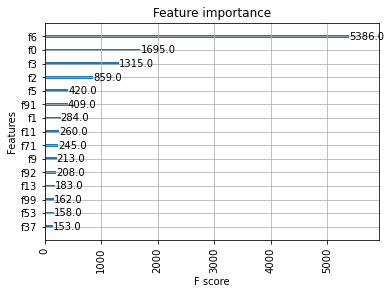

In [101]:
# Plot feature importance
plot_importance(model, max_num_features=15, importance_type='weight')  # You can also use 'gain' or 'cover'
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better visibility
plt.show()
